# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the file `forestfires.csv` is in `../data/fires/`, then you can use the code below to load them.

In [22]:
import pandas as pd
import numpy as np

columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))

#fires_dt.describe()
fires_dt_clean = fires_dt.drop(0).reset_index(drop=True)
fires_dt_clean['area'].unique()

fires_dt_clean = fires_dt_clean.astype({
    'coord_x': int, 
    'coord_y': int, 
    'rh': int})
fires_dt_clean = (fires_dt_clean.astype({
    'ffmc': float, 
    'dmc': float, 
    'dc': float, 
    'isi': float, 
    'temp': float, 
    'wind': float, 
    'rain': float, 
    'area': float}).assign(area = lambda x: np.where(x['area'] > 100, 100, x['area']))
                )
fires_dt_clean = fires_dt_clean[fires_dt_clean['area'] != 0]

print(fires_dt_clean.describe())

          coord_x     coord_y        ffmc         dmc          dc         isi  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean     4.807407    4.366667   91.034074  114.707778  570.867037    9.177037   
std      2.383326    1.170740    3.709020   61.786520  229.981242    4.147350   
min      1.000000    2.000000   63.500000    3.200000   15.300000    0.800000   
25%      3.000000    4.000000   90.325000   82.900000  486.500000    6.800000   
50%      5.000000    4.000000   91.700000  111.700000  665.600000    8.400000   
75%      7.000000    5.000000   92.975000  141.300000  721.325000   11.375000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   22.700000   

             temp          rh        wind        rain        area  
count  270.000000  270.000000  270.000000  270.000000  270.000000  
mean    19.311111   43.733333    4.112963    0.028889   15.895481  
std      6.179444   15.080059    1.884573    0.398392   24.265373 

# Get X and Y

Create the features data frame and target data.

In [23]:
from sklearn.model_selection import train_test_split

X = fires_dt_clean.drop(columns='area')
Y = fires_dt_clean['area']

display(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain
137,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0
138,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0
139,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0
140,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0
141,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
508,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4
509,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0
511,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
512,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# preproc1
numeric_col = ['coord_x', 'coord_y', 'rh', 'ffmc', 'dmc', 'dc', 'isi', 'temp','wind', 'rain']
categorical_col = ['month', 'day']

numeric_1 = Pipeline([ 
    ('scaler', RobustScaler())
])

categorical_1 = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preproc1 = ColumnTransformer([
    ('numeric_trasnforms', numeric_1, numeric_col),
    ('categorical_trasnforms', categorical_1, categorical_col)
])

preproc1

ColumnTransformer(transformers=[('numeric_trasnforms',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['coord_x', 'coord_y', 'rh', 'ffmc', 'dmc',
                                  'dc', 'isi', 'temp', 'wind', 'rain']),
                                ('categorical_trasnforms',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [25]:
# preproc2
from sklearn.preprocessing import FunctionTransformer, RobustScaler

numeric_2 = Pipeline([ 
    ('scaler', RobustScaler()),
    ('transform', FunctionTransformer(np.exp, validate=True))    
])

categorical_2 = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preproc2 = ColumnTransformer([
    ('numeric_trasnforms_2', numeric_2, numeric_col),
    ('categorical_trasnforms', categorical_2, categorical_col)
])

preproc2

ColumnTransformer(transformers=[('numeric_trasnforms_2',
                                 Pipeline(steps=[('scaler', RobustScaler()),
                                                 ('transform',
                                                  FunctionTransformer(func=<ufunc 'exp'>,
                                                                      validate=True))]),
                                 ['coord_x', 'coord_y', 'rh', 'ffmc', 'dmc',
                                  'dc', 'isi', 'temp', 'wind', 'rain']),
                                ('categorical_trasnforms',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [26]:
# Pipeline A = preproc1 + baseline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pipeline_A = Pipeline([
                        ('preprocessing', preproc1),
                        ('regressor', LinearRegression())
                    ])

pipeline_A.fit(X_train, Y_train)

prediction_A = pipeline_A.predict(X_train)
print("MSE = " + str(mean_squared_error(Y_train, prediction_A)))
print("R^2 = " + str(r2_score(Y_train, prediction_A)))

MSE = 477.726316856779
R^2 = 0.22137326433736593


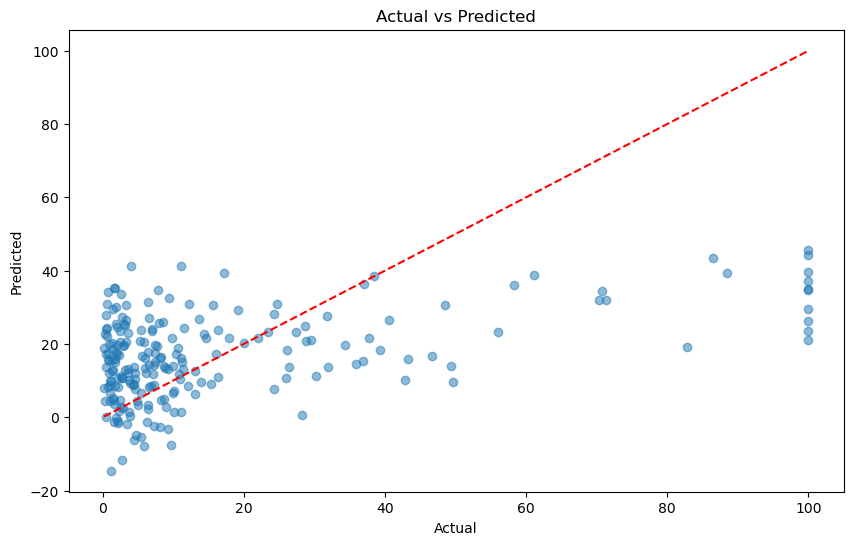

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x=Y_train, y=prediction_A, alpha=0.5)
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [28]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
                        ('preprocessing', preproc2),
                        ('regressor', LinearRegression())
                    ])

pipeline_B.fit(X_train, Y_train)

prediction_B = pipeline_B.predict(X_train)
print("MSE = " + str(mean_squared_error(Y_train, prediction_B)))
print("R^2 = " + str(r2_score(Y_train, prediction_B)))

MSE = 507.1083061655422
R^2 = 0.17348475241011674


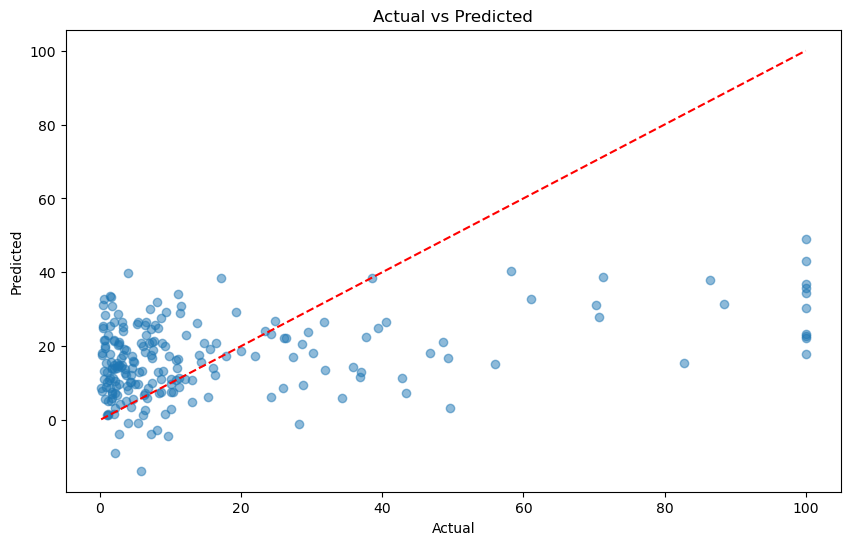

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Y_train, y=prediction_B, alpha=0.5)
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [30]:
# Pipeline C = preproc1 + advanced model
from sklearn.ensemble import RandomForestRegressor
pipeline_C = Pipeline([
                        ('preprocessing', preproc1),
                        ('regressor', RandomForestRegressor(random_state=42))
                    ])
                    
pipeline_C.fit(X_train, Y_train)

prediction_C = pipeline_C.predict(X_train)
print("MSE = " + str(mean_squared_error(Y_train, prediction_C)))
print("R^2 = " + str(r2_score(Y_train, prediction_C)))

MSE = 94.2363358266366
R^2 = 0.8464080207507191


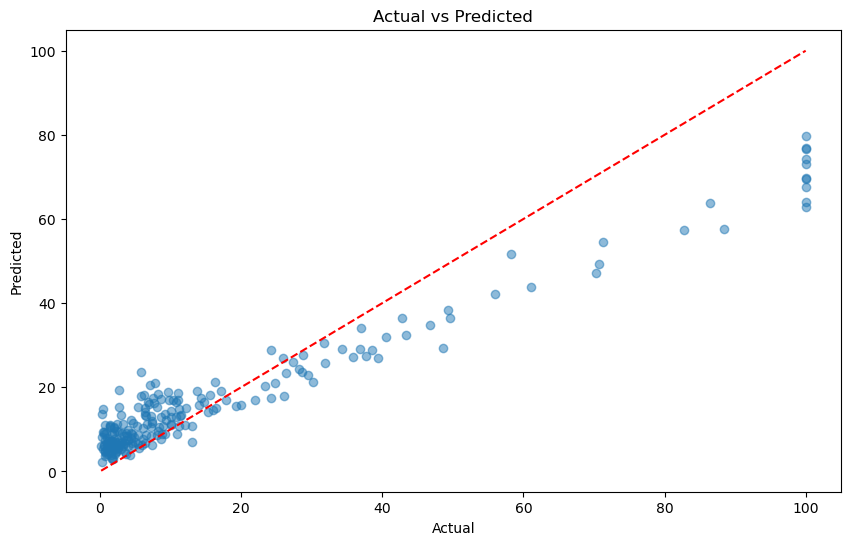

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Y_train, y=prediction_C, alpha=0.5)
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline([
                        ('preprocessing', preproc2),
                        ('regressor', RandomForestRegressor(random_state=42))
                    ])

pipeline_D.fit(X_train, Y_train)

prediction_D = pipeline_D.predict(X_train)
print("MSE= " + str(mean_squared_error(Y_train, prediction_D)))
print("R^2= " + str(r2_score(Y_train, prediction_D)))

MSE= 94.67565289951663
R^2= 0.8456919956830024


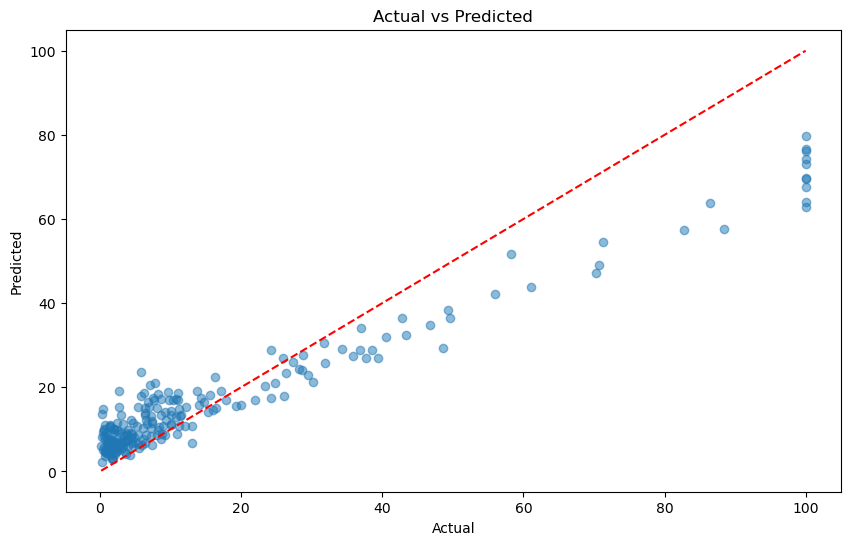

In [33]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x=Y_train, y=prediction_D, alpha=0.5)
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [34]:
#PipelineA
from sklearn.model_selection import  GridSearchCV
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [4, 11, 19]
}

g_search = GridSearchCV(pipeline_A, param_grid, cv=5,  scoring='neg_mean_squared_error', n_jobs = -1)
g_search.fit(X_train, Y_train)

model = g_search.best_estimator_
Grid_prediction_A = model.predict(X_train)

print("MSE = " + str(mean_squared_error(Y_train, Grid_prediction_A)))
print("R^2 = " + str(r2_score(Y_train, Grid_prediction_A)))

MSE = 477.726316856779
R^2 = 0.22137326433736593


In [35]:
#PipelineA
from sklearn.model_selection import  GridSearchCV
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [4, 11, 19]
}

g_search = GridSearchCV(pipeline_B, param_grid, cv=5,  scoring='neg_mean_squared_error', n_jobs = -1)
g_search.fit(X_train, Y_train)

model = g_search.best_estimator_
Grid_prediction_B = model.predict(X_train)

print("MSE = " + str(mean_squared_error(Y_train, Grid_prediction_B)))
print("R^2 = " + str(r2_score(Y_train, Grid_prediction_B)))

MSE = 507.1083061655422
R^2 = 0.17348475241011674


In [36]:
#PipelineC
param_grid = {
    'regressor__n_estimators': [100, 200, 400, 800],
    'regressor__max_depth': [5, 10, 20, None],
    'regressor__min_samples_split': [2, 5, 10]
}

g_search = GridSearchCV(pipeline_C, param_grid, cv = 5,  scoring = 'r2', refit = "r2")
g_search.fit(X_train, Y_train)

model = g_search.best_estimator_
Grid_prediction_C = model.predict(X_train)

print("MSE = " + str(mean_squared_error(Y_train, Grid_prediction_C)))
print("R^2 = " + str(r2_score(Y_train, Grid_prediction_C)))

MSE = 342.99134122256606
R^2 = 0.4409723330005708


In [37]:
#PipelineD
param_grid = {
    'regressor__n_estimators': [20, 100, 500, 1000],
    'regressor__max_depth': [5, 10, 20, None],
    'regressor__min_samples_split': [2, 5, 10]
}

g_search = GridSearchCV(pipeline_D, param_grid, cv = 5,  scoring = 'r2', n_jobs = -1)
g_search.fit(X_train, Y_train)

model = g_search.best_estimator_
Grid_prediction_D = model.predict(X_train)

print("MSE = " + str(mean_squared_error(Y_train, Grid_prediction_D)))
print("R^2 = " + str(r2_score(Y_train, Grid_prediction_D)))

MSE = 313.07220140310284
R^2 = 0.4897363247453391


# Evaluate

+ Which model has the best performance?

# Export

+ Save the best performing model to a pickle file.

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [38]:
preproc2.fit(X_train)  
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if transformer == 'drop' or transformer == 'passthrough':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
        else:
            names = columns
        feature_names.extend(names)
    return feature_names

feature_names = get_feature_names(preproc1)
X_train_transformed = preproc1.transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
print(X_train_transformed_df.head())

   coord_x  coord_y    rh      ffmc       dmc        dc       isi      temp  \
0    -0.75      0.0 -0.45  0.740741 -0.203896 -0.470085  1.355932  1.104377   
1     0.75      2.0  0.45 -2.222222 -0.328222 -0.207459 -0.406780 -0.363636   
2     0.50      0.0  1.80 -0.222222  2.753419  0.629759 -0.293785 -0.848485   
3     0.25      1.0 -0.10 -0.444444 -0.280149 -1.417638 -0.203390 -0.134680   
4     0.75      2.0  0.25 -0.185185 -0.313303  0.291764 -0.271186  0.080808   

       wind  rain  ...  month_may  month_oct  month_sep  day_fri  day_mon  \
0  0.000000   0.0  ...        0.0        0.0        0.0      0.0      1.0   
1  0.000000   0.0  ...        0.0        0.0        0.0      0.0      0.0   
2  1.636364   0.0  ...        0.0        0.0        1.0      0.0      0.0   
3  0.636364   0.0  ...        0.0        0.0        0.0      0.0      1.0   
4 -0.590909   0.0  ...        0.0        0.0        1.0      1.0      0.0   

   day_sat  day_sun  day_thu  day_tue  day_wed  
0      0.0   

*(Answer here.)*

Saved model


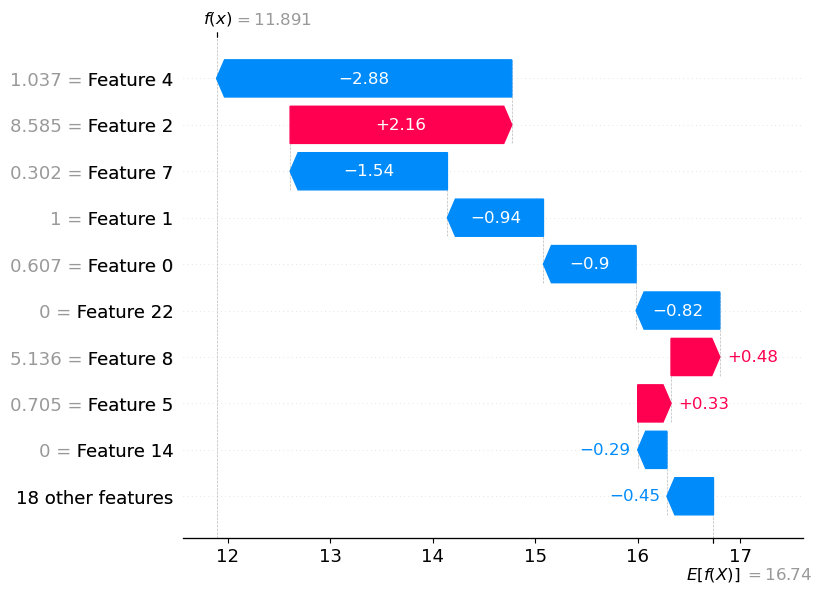

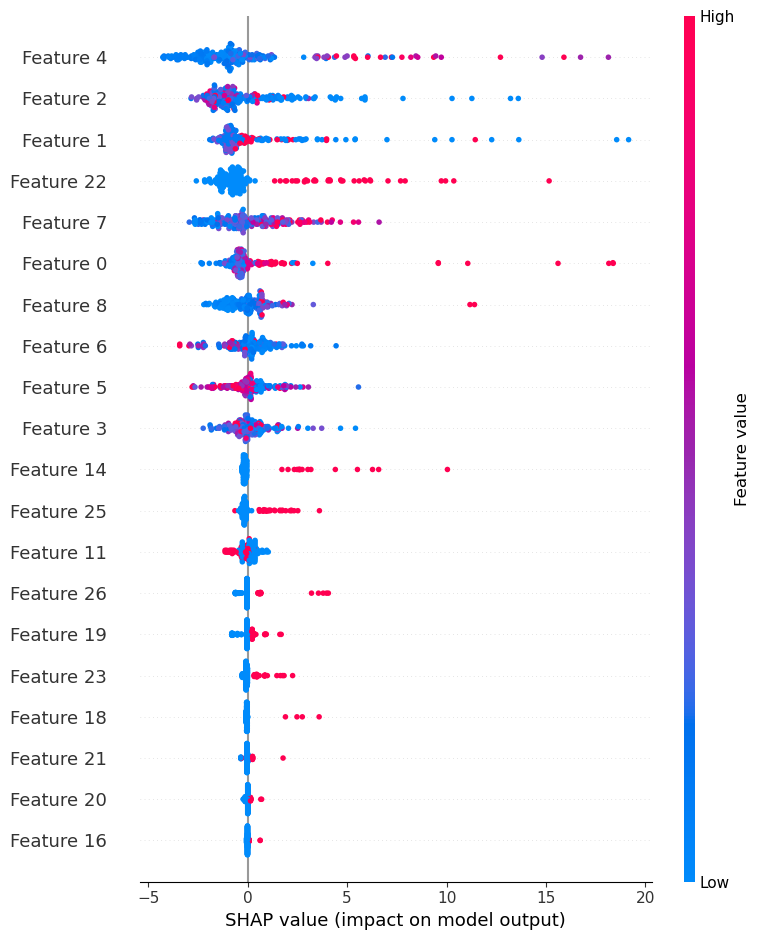

In [39]:
import pickle
import shap

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Saved model")

with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

X_test_transformed = preproc2.transform(X_test)
observation_transformed = X_test_transformed[1].reshape(1, -1)

explainer = shap.Explainer(model.named_steps['regressor'], X_test_transformed)
shap_values = explainer(observation_transformed)

shap.plots.waterfall(shap_values[0])
X_train_transformed = preproc2.transform(X_train)
explainer = shap.Explainer(model.named_steps['regressor'], X_train_transformed)

shap_values_train = explainer(X_train_transformed)
shap.summary_plot(shap_values_train, X_train_transformed)

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.